In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [3]:
data= pd.read_csv("./Documents/Python Scripts/datasets/customer-churn-model/Customer Churn Model.txt")

In [4]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


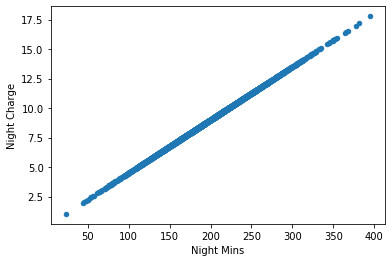

In [5]:
data.plot(kind="scatter", x="Night Mins", y ="Night Charge")

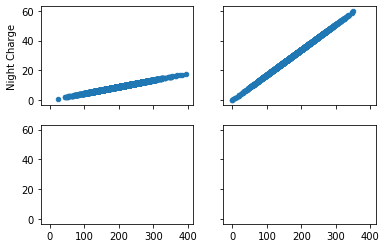

In [6]:
figure ,axs= plt.subplots (2,2, sharey = True, sharex=True)
data.plot(kind="scatter", x="Night Mins", y ="Night Charge", ax=axs [0][0])
data.plot(kind="scatter", x ="Day Mins", y ="Day Charge", ax=axs [0][1])

Text(0, 0.5, 'numero de dias')

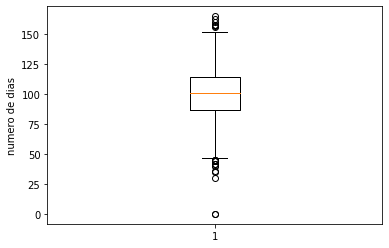

In [7]:
plt.boxplot(data["Day Calls"])
plt.ylabel("numero de dias")

In [8]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [9]:
#Data Wrangling

In [10]:
account_length=data["Account Length"]

In [11]:
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [12]:
# para extraer solo columnas q se necesitan

In [13]:
type(account_length)

pandas.core.series.Series

In [14]:
subset=data[["Account Length","Day Mins","Day Charge"]]

In [15]:
subset.head()

,Account Length,Day Mins,Day Charge
0,128,265.1,45.07
1,107,161.6,27.47
2,137,243.4,41.38
3,84,299.4,50.90
4,75,166.7,28.34


In [16]:
desired_columns=["Account Length","Day Mins","Day Charge"]
desired_columns

['Account Length', 'Day Mins', 'Day Charge']

In [17]:
all_columns_list=data.columns.values.tolist()
all_columns_list

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [18]:
sublist=[x for x in all_columns_list if x not in desired_columns]
sublist

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Calls',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [19]:
subset=data[sublist]
subset.head()

,State,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Calls,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,25,110,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,26,123,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,0,114,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,0,71,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,0,113,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
data[3:7]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.


In [21]:
#usuarios con total mins > 500

In [22]:
data1=data[data["Day Mins"]>200]
data1

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,SC,181,408,406-6304,no,no,0,229.9,130,39.08,...,93,12.27,262.4,110,11.81,14.2,4,3.83,2,False.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [23]:
data2=data[data["Night Mins"]<100]
data2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
16,ID,85,408,350-8884,no,yes,27,196.4,139,33.39,...,90,23.88,89.3,75,4.02,13.8,4,3.73,1,False.
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False.
116,NJ,64,510,391-4652,no,no,0,162.6,83,27.64,...,109,12.95,57.5,122,2.59,14.2,3,3.83,1,False.
170,CO,68,408,338-9398,no,no,0,237.1,105,40.31,...,105,19.00,97.4,79,4.38,13.2,2,3.56,1,False.
187,AZ,93,415,399-7865,no,no,0,271.6,71,46.17,...,108,19.50,77.3,121,3.48,10.9,3,2.94,2,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,MT,103,510,342-1004,no,yes,35,110.5,101,18.79,...,81,17.71,87.4,77,3.93,13.9,2,3.75,4,True.
3024,OR,101,415,398-5851,no,no,0,118.6,89,20.16,...,97,16.97,53.3,61,2.40,11.5,5,3.11,1,False.
3047,AZ,88,415,417-9844,no,no,0,172.8,81,29.38,...,90,16.44,89.6,107,4.03,12.8,5,3.46,2,False.
3159,ND,27,415,405-1589,no,no,0,227.4,67,38.66,...,115,21.08,61.4,109,2.76,7.8,6,2.11,1,False.


In [24]:
data3=data[data["Night Mins"]<200]
data3

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False.
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.


In [25]:
data4=data[data["State"]=="NY"]
data4

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,NY,150,415,421-6268,no,yes,35,139.6,72,23.73,...,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False.
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.


In [26]:
#AND-> & las 2 entradas tiene que es 1 
data5=data[(data["Day Mins"]>300)&(data["State"]=="NY")]
data5

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [27]:
data6=data[(data["Day Mins"]>300)|(data["State"]=="NY")]
data6

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.
3310,NY,94,415,363-1123,no,no,0,190.4,91,32.37,...,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False.


In [28]:
## minutos de dia , de noche y longtud de la cuenta de los primeros 50 induviduos
subset_first_50=data[["Account Length","Day Mins","Night Mins"]][:50]
subset_first_50.head()

,Account Length,Day Mins,Night Mins
0,128,265.1,244.7
1,107,161.6,254.4
2,137,243.4,162.6
3,84,299.4,196.9
4,75,166.7,186.9


In [29]:
##segunda manera sirve para seleccion columnas juntas prinero filas segundo columnas
data.iloc[1:10, 3:6]

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [30]:
data.iloc[:,[2,5,7]]

,Area Code,VMail Plan,Day Mins
0,415,yes,265.1
1,415,yes,161.6
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7
...,...,...,...
3328,415,yes,156.2
3329,415,no,231.1
3330,510,no,180.8
3331,510,no,213.8


In [31]:
data.loc[[2,3,4],["Area Code","VMail Plan","Day Mins"]]

,Area Code,VMail Plan,Day Mins
2,415,no,243.4
3,408,no,299.4
4,415,no,166.7


In [32]:
#PARA dumas varias columnas

In [33]:
data["total mins"]= data["Day Mins"] + data["Night Mins"] + data["Eve Mins"]
data["total mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: total mins, dtype: float64

In [34]:
data["total calls"]= data["Day Mins"] + data["Night Mins"] + data["Eve Mins"]
data["total calls"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: total calls, dtype: float64

In [35]:
data.shape

(3333, 23)

In [36]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,total mins,total calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,707.2
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,611.5
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,527.2
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,558.2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,501.9


In [37]:
## generacion de numero aleatorios

In [38]:
np.random.randint(1,100)

45

In [39]:
np.random.random()

0.2397172088341013

In [40]:
##funcion para generar una lista de numeros aleatorios

In [41]:
def  randint_list (n , a ,b):
    x=[]
    for i in range (n):
        x.append(np.random.randint(a,b))
    return x

In [42]:
randint_list(25,1,50)

[12,
 42,
 18,
 43,
 10,
 6,
 21,
 40,
 12,
 17,
 38,
 38,
 44,
 2,
 35,
 26,
 35,
 44,
 35,
 35,
 31,
 47,
 8,
 38,
 42]

In [43]:
import random

In [44]:
for i in range (10):
    print (random.randrange(1,100,7))


8
8
85
8
50
36
22
43
22
85


In [45]:
a=np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [46]:
np.random.shuffle(a)
a

array([54,  2, 85,  4, 14, 56, 47, 60, 95, 93, 76, 17, 52, 34, 62, 23, 80,
       78, 19, 29, 25, 79, 81, 57, 42, 33,  8, 73, 45, 82, 44, 51, 31,  9,
       59, 87, 41, 48, 72, 92, 68, 32, 53, 24,  1, 83, 15, 94, 13, 16, 35,
       69, 88, 98, 64, 75, 86, 10, 63, 18, 40, 43,  3, 66, 11, 30, 96, 67,
       89,  7, 50, 21,  6, 20, 65, 26, 84, 71,  0, 58, 28, 36,  5, 90, 99,
       55, 74, 22, 46, 12, 91, 27, 38, 97, 49, 61, 39, 70, 77, 37])

In [47]:
np.random.choice(all_columns_list)

'Intl Charge'

In [48]:
np.random.seed(2018)
for i in range(5):
    print (np.random.random())


0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


Simulacion de montecarlo
    